In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl

from functions import Polynomial_Features
from runge_function import Runge_func
from OLS import OLS
from Ridge import Ridge
from LASSO import LASSO
from plotting import set_plot_params

mse centered     4.391897474303148e-06
mse not centered 4.391897474275085e-06
R^2 centered     0.9999804732904047
R^2 not centered 0.9999804732904047


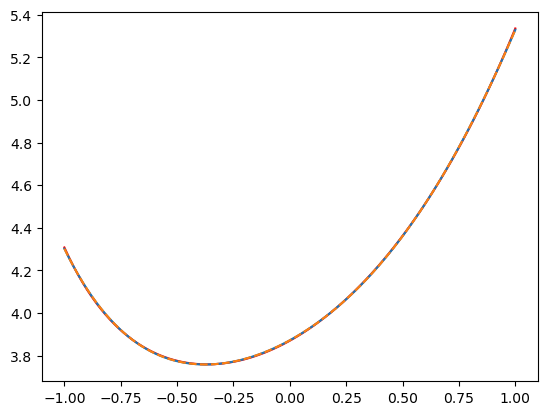

In [28]:
n = 100
x = np.linspace(-1,1,n)
y = np.exp(x)+np.exp(1/(x+2))+np.exp(0.2)
y_noise = y + np.random.normal(0,1,n)

X = Polynomial_Features(x, 5)

X_tr, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

y_offset = y_train.mean()

y_train_centered = y_train - y_offset

model_centered = OLS("analytic")
model_not_centered = OLS("analytic")

thetas_centered, _, _ = model_centered.fit(X_tr_scaled, y_train_centered)
thetas_not_centered, _, _ = model_not_centered.fit(X_tr_scaled, y_train)

y_predict_centered = X_test_scaled @ thetas_centered + y_offset
y_predict_not_centered = X_test_scaled @ thetas_not_centered + y_offset

mse_centered = mean_squared_error(y_test, y_predict_centered)
mse_not_centered = mean_squared_error(y_test, y_predict_not_centered)

r2_centered = r2_score(y_test, y_predict_centered)
r2_not_centered = r2_score(y_test, y_predict_centered)

print("mse centered    ", mse_centered)
print("mse not centered", mse_not_centered)
print("R^2 centered    ", r2_centered)
print("R^2 not centered", r2_not_centered)

y_plot_centered = X_scaled @ thetas_centered + y_offset
y_plot_not_centered = X_scaled @ thetas_not_centered + y_offset

plt.plot(x,y, label="True y", color = "red")
plt.plot(X[:,0], y_plot_centered, label = "y centered")
plt.plot(X[:,0], y_plot_not_centered, label = "y not centered", linestyle="--")
